<a href="https://colab.research.google.com/github/zhkfei-wq/810/blob/main/Homework1_Kefei%20Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(10 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

Provide python code and analysis results first. Use them to support your answers to the two questions above.

FYI the column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [45]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/zhkfei-wq/810/main/Auto.csv'
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape}")
print("What type of data are stored in the columns:")
df.info()
print("\nTop 3 rows:")
display(df.head(3))
print("\nSummary statistics of each column:")
df.describe()

Dataset shape: (397, 9)
What type of data are stored in the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB

Top 3 rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite



Summary statistics of each column:


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
print("\nThe number of unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


The number of unique values in each column:
mpg: 129 unique values
cylinders: 5 unique values
displacement: 82 unique values
horsepower: 94 unique values
weight: 350 unique values
acceleration: 95 unique values
year: 13 unique values
origin: 3 unique values
name: 304 unique values


**Question 1: **
Remove the ‘name’ variable
1. Vehicle names primarily serve as identifying information rather than meaningful predictors.
2. Structured variables like year, origin, and cylinders may adequately capture name information. Including the name could introduce multicollinearity.

**Question2: **
Criteria for Determination:
* Numeric Variable Criteria: Possesses a  large number of unique values, continuous distribution, and numerical magnitude with practical mathematical significance.
* Categorical Variable Criteria: Finite discrete values, representing categories rather than continuous quantities, with numerical values lacking mathematical operational meaning.

Numeric Variables:
* mpg: Continuous numerical value with 129 unique values, representing a continuous measurement of fuel efficiency.
* displacement: 82 unique values, a physical measurement of engine displacement.
* horsepower: 94 unique values, engine power.
* weight: 350 unique values, a continuous measurement of vehicle weight. displacement: 82 unique values, physical measurement of engine displacement
* horsepower: 94 unique values, engine power
* weight: 350 unique values, continuous measurement of vehicle weight
* acceleration: 95 unique values, continuous measurement of acceleration time

Categorical variables:
* cylinders: only 5 discrete values (3,4,5,6,8), representing different engine configuration types
* year: 13 distinct years
* origin: 3 categories, representing different manufacturing regions

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

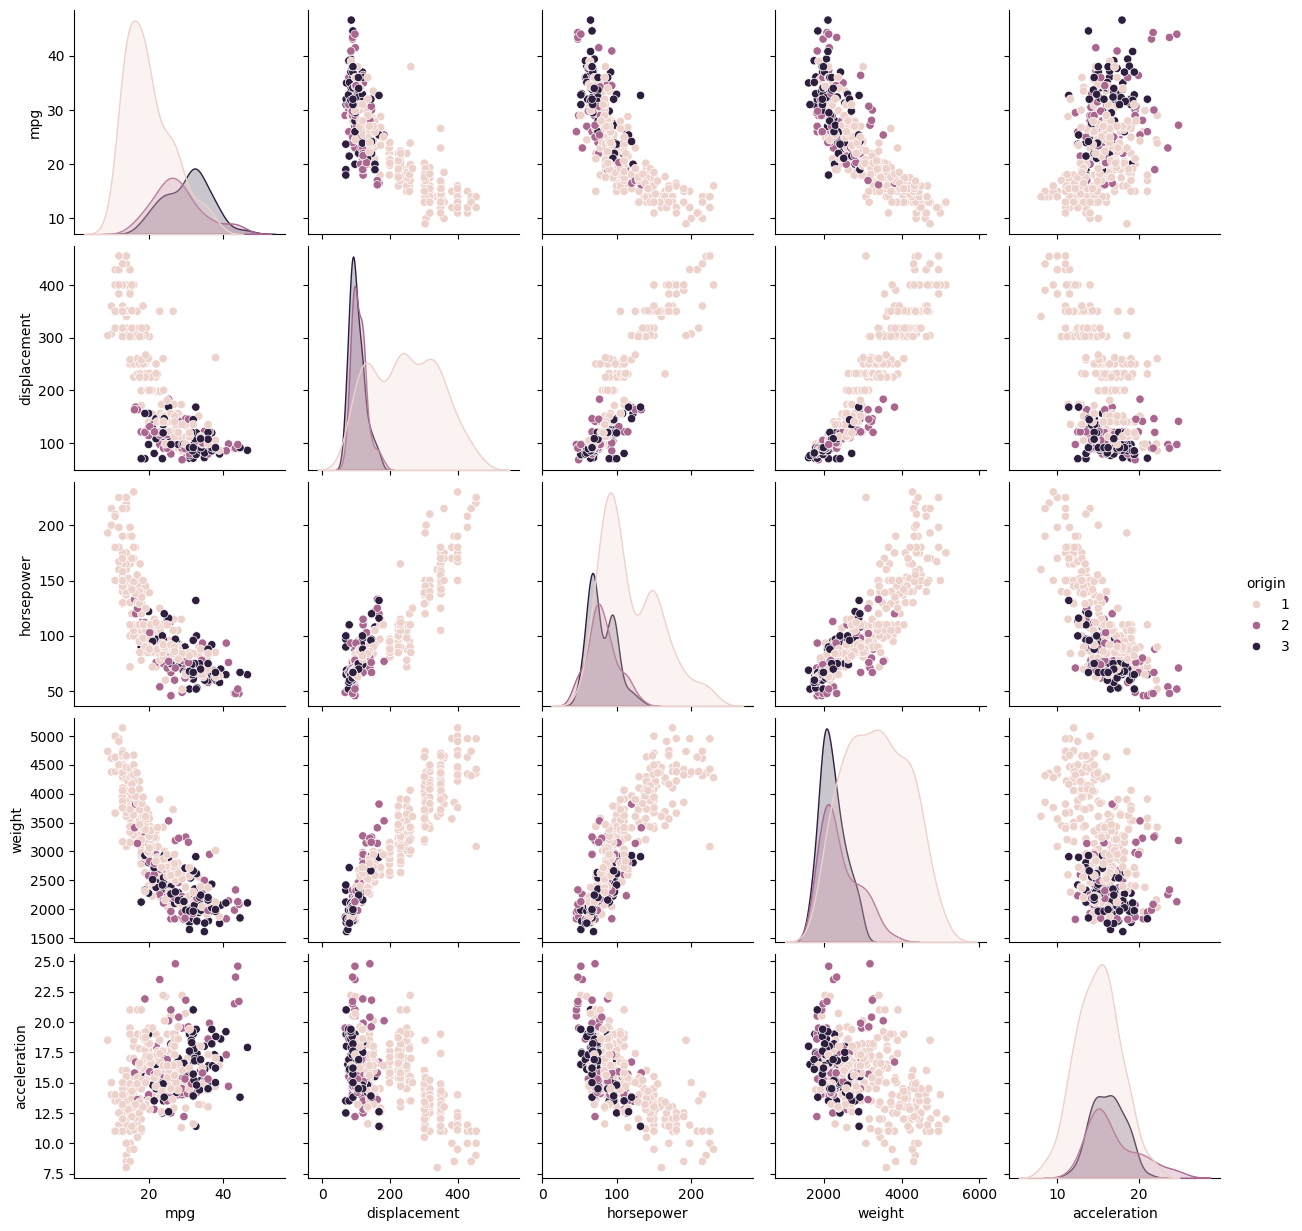

In [47]:
import seaborn as sns

df['horsepower'] = df['horsepower'].replace('?', pd.NA)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

num_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(df, vars=num_vars, hue='origin')

* Relationship 1: MPG and Vehicle Physical Characteristics
Observation:
MPG exhibits a strong negative correlation with weight.
MPG shows a significant negative correlation with displacement.
MPG also demonstrates a clear negative correlation with horsepower.
Heavier vehicles require more energy to accelerate, while larger displacement/higher-horsepower engines typically consume more fuel. This reflects the fundamental trade-off between vehicle performance (power, size) and fuel economy.

* Relationship 2: Horsepower and Acceleration Show a Negative Correlation
Contrary to intuition, vehicles with higher horsepower actually accelerate more slowly.
This may be because high-horsepower vehicles are typically heavier, with weight offsetting the horsepower advantage. Additionally, high-performance vehicles may prioritize high-speed stability over initial acceleration.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (10+10=**20 points total**)

In [73]:
# Select numerical variables
num_variables = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix.round(3))

                mpg  displacement  horsepower  weight  acceleration
mpg           1.000        -0.804      -0.774  -0.832         0.422
displacement -0.804         1.000       0.896   0.933        -0.544
horsepower   -0.774         0.896       1.000   0.863        -0.688
weight       -0.832         0.933       0.863   1.000        -0.420
acceleration  0.422        -0.544      -0.688  -0.420         1.000


Among these correlations, Displacement and Weight exhibit the highest correlation coefficient of 0.933. A value of 0.933 exceeding 0.8 falls within the range of strong correlation, approaching near-perfect perfect correlation. In practical terms, this reflects that engine displacement and vehicle weight are co-designed during vehicle development. However, it is important to note that such a strong correlation indicates that these two variables may cause multicollinearity issues in regression analysis. This problem must be considered when selecting variables for subsequent analyses.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#year serves as a categorical variable
formula_cat = 'mpg ~ displacement + horsepower + weight + acceleration + C(year) + C(origin) + C(cylinders) '
model_cat = smf.ols(formula_cat, data=df_reg).fit()
print(model_cat.summary())

#year serves as a numerical variable
formula_num = 'mpg ~ + displacement + horsepower + weight + acceleration + year + C(cylinders) + C(origin)'
model2 = smf.ols(formula_num, data=df_reg).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          3.19e-153
Time:                        23:00:07   Log-Likelihood:                -968.51
No. Observations:                 397   AIC:                             1983.
Df Residuals:                     374   BIC:                             2075.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.5881      2.36

Q4.1:
1. Weight has the most significant impact, with a coefficient of -0.0054 and a p-value below 0.001. This indicates that for every additional pound of vehicle weight, fuel efficiency decreases by approximately 0.0054 MPG. This suggests heavier vehicles require more energy to move, providing strong data support for automotive lightweight design.

2. Horsepower exhibits a significant negative impact, with a coefficient of -0.0351 and a p-value of 0.006. This indicates that engines with greater horsepower typically consume more fuel.

3. Origin: European and Japanese vehicles demonstrate MPG advantages of 1.90 and 2.34 over American vehicles, respectively. This reflects significant differences in fuel efficiency design philosophies among automakers across regions.

4. Cylinders: 4-cylinder, 5-cylinder, 6-cylinder, and 8-cylinder vehicles all exhibit significantly higher MPG than the baseline group, with 4-cylinder vehicles showing the most pronounced advantage at 6.81 MPG.

5. Year effect: Compared to the 1970 baseline, MPG improvements range from 3.08 to 9.12 for each year from 1977 to 1982, with 1980 showing the most significant increase.

Q4.2:

1. Certain years: 1971-1976 show no significant effect
2. Acceleration is not significant

The p-value for acceleration is as high as 0.707, indicating that acceleration time has no significant independent effect on fuel efficiency. This finding contradicts intuition, as superior acceleration performance is often associated with more efficient engine design. The apparent discrepancy likely stems from multicollinearity issues, as indicated by the model's condition number of 7.98e+04. Specifically, acceleration time is highly correlated with variables like engine horsepower and vehicle weight. Once these strong predictors are included in the model, acceleration time's additional explanatory power becomes negligible.

Q4.3：

* The R-squared value for the categorical year model is 0.874, higher than the 0.847 for the numerical year model, indicating that categorical processing better explains the variation in fuel efficiency.

* The categorical model identifies how automotive technology evolved across different years, particularly the highly correlated peak MPG improvement observed in 1980.

* Regarding variable significance, horsepower exhibits stronger significance in the categorical model, with all cylinder count levels reaching statistical significance. In contrast, the 6-cylinder category shows only marginal significance in the numerical model.

## Q5. From the above regression model in Q4, include interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [50]:
# Model 1: weight and origin
formula1 = 'mpg ~ weight + C(origin) + weight:C(origin) + displacement + horsepower + acceleration + C(year)'
model1 = smf.ols(formula1, data=df_reg).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          7.57e-150
Time:                        22:48:51   Log-Likelihood:                -981.95
No. Observations:                 397   AIC:                             2006.
Df Residuals:                     376   BIC:                             2090.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.52

This interaction term is highly significant, with coefficients of -0.0024 for European vehicles and -0.0056 for Japanese vehicles, corresponding to p-values of 0.006 and less than 0.001, respectively. This indicates that the negative impact of weight on fuel efficiency varies significantly across vehicles of different origins.

For every 1-pound increase in weight for European vehicles, MPG decreases by approximately 0.0048 + 0.0024 = 0.0072; for every 1-pound increase in weight for Japanese vehicles, MPG decreases by approximately 0.0048 + 0.0056 = 0.0104; For every additional pound of weight in American vehicles, MPG decreases by approximately 0.0048. This indicates that Japanese vehicles are most sensitive to weight increases, while American vehicles are relatively the least sensitive.

In [51]:
# Model 2: horsepower and cylinders
formula2 = 'mpg ~ horsepower + C(cylinders) + horsepower:C(cylinders) + weight + acceleration + C(year) + C(origin)'
model2 = smf.ols(formula2, data=df_reg).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          1.19e-162
Time:                        22:48:51   Log-Likelihood:                -937.40
No. Observations:                 397   AIC:                             1927.
Df Residuals:                     371   BIC:                             2030.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The interaction term is not significant overall.

Across different cylinder configurations, the pattern of horsepower's impact on fuel efficiency remains relatively consistent, with no significant differentiated effects observed.


In [52]:
# Model 3: year and weight
formula3 = 'mpg ~ weight + C(year) + weight:C(year) + displacement + horsepower + acceleration + C(origin) + C(cylinders)'
model3 = smf.ols(formula3, data=df_reg).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     89.85
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          7.61e-155
Time:                        22:48:51   Log-Likelihood:                -934.01
No. Observations:                 397   AIC:                             1938.
Df Residuals:                     362   BIC:                             2077.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               27.5384 

This interaction term is highly significant. Interaction terms across multiple years have all reached statistical significance.

Starting in 1978, the negative impact of weight on MPG gradually diminished, indicating that as technology advanced, automakers successfully improved the fuel efficiency of heavier vehicles. This trend was particularly pronounced between 1979 and 1981.

## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

If you run into a problem because some values of a categorical column are missing in the training set, check the parameter `handle_unknown` for the OneHotEncoding class.

In [75]:
# Divide the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define categorical variables and numerical variables
cat_features = ['cylinders', 'year', 'origin']
num_features = ['displacement', 'horsepower', 'weight', 'acceleration']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ])

# Create a pipeline: Preprocess linear regression
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on the training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['cylinders', 'year',
                                                   'origin'])])),
                ('regressor', LinearRegression())])

In [69]:
# Calculate R² within the sample
y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate the out-of-sample R²
y_test_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R² (training set): {train_r2:.4f}")
print(f"R² (test set): {test_r2:.4f}")
print(f"R² difference: {train_r2 - test_r2:.4f}")

R² (training set): 0.8720
R² (test set): 0.8713
R² difference: 0.0006


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
2. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here

Then I wrote the code that is submitted in the assignment.

3. I did not discuss with anyone or get any help from any generative AI tool.

* I did not discuss with anyone.

* The initial plot generated for the second question was missing the horsepower variable, so I consulted Deepseek. They informed me this was due to five missing data points, so I performed basic data cleaning to fill in the five missing values.

## Submit
1. Submit your colab notebook as a pdf file. Use the code in [this notebook](https://colab.research.google.com/drive/1ZZLCXbvUS3DEpZt9fgVVhZxWMxNigu2a?usp=sharing) to convert your notebook to professional looking pdf. Do review the pdf file to make sure everything is appearing correctly before submitting!
1. Include a link to the colab notebook in your submission and make sure to provide us (TAs and professor) access to view it.
